In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_digits

In [3]:
data = load_digits()

In [5]:
img = data.data

In [6]:
img.shape

(1797, 64)

In [7]:
label = data.target

In [8]:
label_class = data.target_names

In [9]:
print("Label calss is : ",label_class)

Label calss is :  [0 1 2 3 4 5 6 7 8 9]


In [10]:
#visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def imshow(index):
    plt.imshow(img[index].reshape((8,8)))
    plt.title("Digit is : %d"%label[index])
    plt.xticks([])
    plt.yticks([])

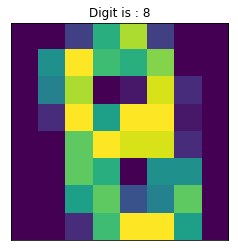

In [18]:
imshow(500)

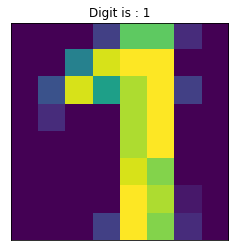

In [19]:
imshow(1500)

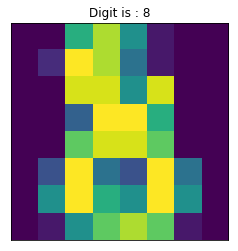

In [20]:
imshow(1796)

In [21]:
image = img.reshape((img.shape[0],8,8,1))

In [22]:
image.shape

(1797, 8, 8, 1)

In [24]:
label = label.reshape(label.shape[0],1)

In [25]:
label.shape

(1797, 1)

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(image, label, test_size=0.25, random_state=101)

In [29]:
X_train.shape

(1347, 8, 8, 1)

In [71]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(8,8,1)),
    tf.keras.layers.MaxPool2D((2,2),),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [72]:
#model1.summary()

In [73]:
model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

In [74]:
model1.fit(X_train,y_train,batch_size=10,epochs=20,)

Train on 1347 samples
Epoch 1/20
1347/1347 [==============================] - 1s 863us/sample - loss: 0.7887 - acc: 0.7535
Epoch 2/20
1347/1347 [==============================] - 1s 441us/sample - loss: 0.1813 - acc: 0.9414
Epoch 3/20
1347/1347 [==============================] - 1s 416us/sample - loss: 0.1130 - acc: 0.9651
Epoch 4/20
1347/1347 [==============================] - 1s 399us/sample - loss: 0.0803 - acc: 0.9718
Epoch 5/20
1347/1347 [==============================] - 1s 428us/sample - loss: 0.0625 - acc: 0.9822
Epoch 6/20
1347/1347 [==============================] - 1s 411us/sample - loss: 0.0339 - acc: 0.9889
Epoch 7/20
1347/1347 [==============================] - 1s 422us/sample - loss: 0.0265 - acc: 0.9918
Epoch 8/20
1347/1347 [==============================] - 1s 413us/sample - loss: 0.0231 - acc: 0.9918
Epoch 9/20
1347/1347 [==============================] - 1s 409us/sample - loss: 0.0189 - acc: 0.9933
Epoch 10/20
1347/1347 [==============================] - 1s 457us/sam

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
train_datagen = ImageDataGenerator(rescale=(1.0 / 255))
test_datagen  = ImageDataGenerator(rescale=(1.0 / 255))

In [77]:
train = train_datagen.flow(X_train,y_train,batch_size=10)
test  = test_datagen.flow(X_test,y_test,batch_size=10)

In [80]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(8,8,1)),
    tf.keras.layers.MaxPool2D((2,2),),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

In [82]:
history = model2.fit_generator(train,epochs=10,validation_data=test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 135 steps, validate for 45 steps
Epoch 1/10
135/135 [==============================] - 1s 5ms/step - loss: 0.4043 - acc: 0.8990 - val_loss: 0.3851 - val_acc: 0.9111
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.3389 - acc: 0.9072 - val_loss: 0.3430 - val_acc: 0.9178
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.2895 - acc: 0.9213 - val_loss: 0.3053 - val_acc: 0.9289
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.2505 - acc: 0.9317 - val_loss: 0.2628 - val_acc: 0.9467
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.2192 - acc: 0.9384 - val_loss: 0.2516 - val_acc: 0.9289
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.1985 - acc: 0.9443 - val_loss: 0.2484 - val_acc: 0.9356
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.1826 - acc: 0.9436 - val_loss: 0.2183 -

In [91]:
def graph(history):
    f,ax = plt.subplots(1,2,figsize=(16,5))
    ax[0].plot(list(range(10)),history.history['acc'],marker='o',label="Train")
    ax[0].plot(list(range(10)),history.history['val_acc'],marker='o',label="Test")
    ax[0].set_title("Accurecy")
    ax[0].legend()
    
    ax[1].plot(list(range(10)),history.history['loss'],marker='o',label="Train")
    ax[1].plot(list(range(10)),history.history['val_loss'],marker='o',label="Test")
    ax[1].set_title("loss")
    ax[1].legend()

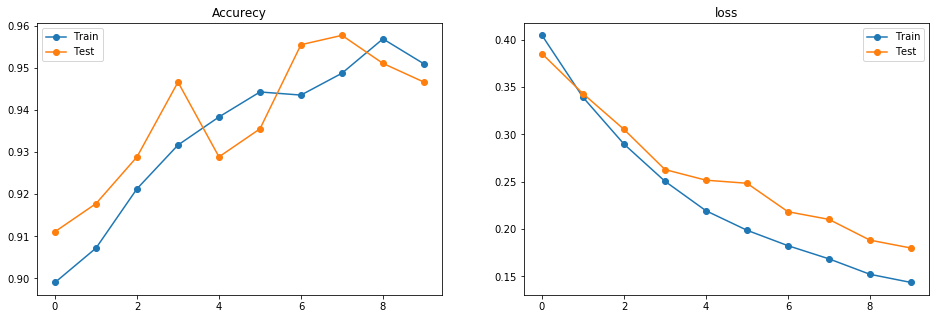

In [92]:
graph(history)

In [93]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(8,8,1)),
    tf.keras.layers.MaxPool2D((2,2),),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

history = model3.fit_generator(train,epochs=10,validation_data=test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 135 steps, validate for 45 steps
Epoch 1/10
135/135 [==============================] - 2s 13ms/step - loss: 2.1447 - acc: 0.3363 - val_loss: 1.8490 - val_acc: 0.5044
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 1.4204 - acc: 0.6244 - val_loss: 1.0833 - val_acc: 0.7556
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.8747 - acc: 0.7654 - val_loss: 0.7591 - val_acc: 0.7733
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.6488 - acc: 0.8144 - val_loss: 0.5827 - val_acc: 0.8289
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.5295 - acc: 0.8441 - val_loss: 0.5890 - val_acc: 0.8000
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.4367 - acc: 0.8738 - val_loss: 0.4541 - val_acc: 0.8667
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.3648 - acc: 0.8924 - val_loss: 0.3845 

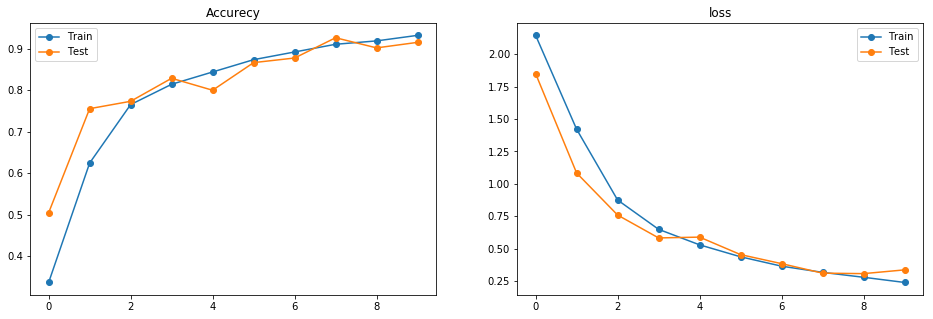

In [96]:
graph(history)

In [158]:
def predict(X_test,y,i):
    plt.imshow(X_test[i].reshape((8,8)))
    plt.title("Digit is : %d    ||    Org is : %d"%(model3.predict_classes(X_test[i:i+1]) , y[i]))
    plt.xticks([])
    plt.yticks([])

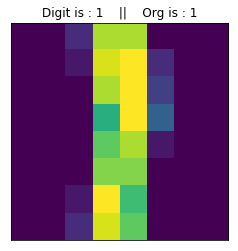

In [159]:
predict(X_train,y_train,509)

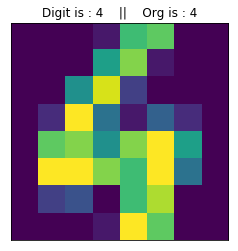

In [160]:
predict(X_test,y_test,210)